In [23]:
import torch

In [25]:
import torch.nn as nn

In [27]:
linear = nn.Linear(in_features=5, out_features=10)
# Shape of weight matrix -> out_features x in_features
# shape of bias vector is out_vecots
linear

Linear(in_features=5, out_features=10, bias=True)

In [33]:
X = torch.rand(20,5)
X.shape

torch.Size([20, 5])

In [35]:
out = linear(X)
out.shape

torch.Size([20, 10])

In [37]:
for param in linear.parameters():
    print(param.shape)

torch.Size([10, 5])
torch.Size([10])


In [39]:
for name, param in linear.named_parameters():
    print(name, param.shape)

weight torch.Size([10, 5])
bias torch.Size([10])


In [41]:
linear.weight.shape, linear.bias.shape

(torch.Size([10, 5]), torch.Size([10]))

In [60]:
# X @ W.T + b
X.shape, linear.weight.T.shape

out_manual = (X @ linear.weight.T) + linear.bias
out_manual.shape

torch.Size([20, 10])

In [64]:
out = linear(X)
out.shape

torch.Size([20, 10])

In [66]:
torch.equal(out_manual, out)

True

In [77]:
linear(X)
linear.__call__(X)
linear.forward(X)

# Callable function nn -> linear -> __call__ -> forward

tensor([[-4.8792e-01, -5.3151e-01,  7.4281e-02, -2.3709e-01,  6.3959e-02,
         -1.8158e-01,  6.1461e-01, -8.3676e-01, -4.8168e-01, -2.2141e-01],
        [-4.1673e-01, -3.6243e-01,  8.9866e-02, -5.1026e-02,  2.2654e-01,
          7.5885e-04,  1.0814e+00, -1.0876e+00, -4.0192e-01, -5.4506e-01],
        [ 7.4326e-02, -4.5583e-02, -7.0835e-02,  2.2786e-01,  3.6968e-01,
         -1.5767e-01,  1.0974e+00, -6.1390e-01, -3.1708e-01, -1.9847e-01],
        [-4.1361e-01, -3.6324e-01,  1.3079e-01, -1.2391e-01,  1.8119e-01,
         -2.9943e-02,  7.4598e-01, -8.7068e-01, -4.7354e-01, -4.1994e-01],
        [-3.2407e-01, -5.1693e-01, -8.9830e-02, -1.4757e-01,  1.0036e-01,
         -9.6673e-02,  9.9670e-01, -9.3348e-01, -4.7494e-01, -2.3679e-01],
        [-6.0226e-01, -4.0709e-01,  5.1654e-02, -3.0211e-01,  2.9760e-02,
          2.8462e-02,  8.3342e-01, -1.1335e+00, -4.0538e-01, -4.9701e-01],
        [-2.9532e-01, -5.5688e-01, -3.4405e-02, -3.9346e-02,  1.8199e-01,
         -2.1062e-01,  1.0480e+0

In [91]:
relu = nn.ReLU()
relu

ReLU()

In [99]:
list(relu.named_parameters())

x = torch.tensor([1., -2., 3., -4.])
relu(x)

tensor([1., 0., 3., 0.])

In [101]:
# Softmax
# Softmax along dim 

soft = nn.Softmax(dim=1)

X = torch.tensor([
    [1., 2., 1.],
    [2., 2., 3.]
])
out = soft(X)
out

tensor([[0.2119, 0.5761, 0.2119],
        [0.2119, 0.2119, 0.5761]])

In [105]:
y_hat = out.argmax(dim=1)
y_hat

tensor([1, 2])

In [113]:
loss_fn = nn.CrossEntropyLoss()
# y is the true tables
# loss_fn(y_hat, y)
#loss_fn(inputs, targets)
# inputs, targets

# inputs need to be logits (pre-softmax values, pre-activation at the output layes)
# targets have to be scalars and not one hot encoded 

In [115]:
y = torch.tensor([0,1])
logits = torch.tensor([
    [1., 3., 4.],
    [2., 5., 1.]
])
logits.shape, y.shape

(torch.Size([2, 3]), torch.Size([2]))

In [126]:
prob = soft(logits)
prob

tensor([[0.0351, 0.2595, 0.7054],
        [0.0466, 0.9362, 0.0171]])

In [132]:
(-torch.log(prob[0,0]) - torch.log(prob[1,1])) / 2

tensor(1.7074)

In [130]:
loss_fn = nn.CrossEntropyLoss()
loss_fn(logits, y)

tensor(1.7074)

In [134]:
# Cross entropy coverts into softmax, then computes loss

In [136]:
# Optimizers

In [142]:
from torch.optim import Adam # we also have many more adagrad etc etc etc a lot 

In [ ]:
# Dataset

In [151]:
from torchvision import datasets
train_data = datasets.MNIST(
    root='data',
    download=True,
    train=True
)
test_data = datasets.MNIST(
    root='data',
    download=True,
    train=False
)

In [155]:
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)


In [157]:
from torch.utils.data import DataLoader


## Neural Network (Feed forward Network)

In [145]:
flatten = nn.Flatten()

In [161]:
train_loader = DataLoader(train_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

X, y = next(iter(train_loader))
X.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
# One hidden layer (fully connected layer)
# 784 features as input
# 256 neurons in the hidden layer


In [181]:
#nn.Module is a parent class
#Every class in nn is written in this

class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(
            in_features=784, out_features=256
        )
        self.relu = nn.ReLU()
        self.output = nn.Linear(
            in_features=256, out_features=10
        )
    def forward(self, X):
        X = self.flatten(X)
        X = self.linear(X)
        X = self.relu(X)
        X = self.output(X)
        return X

model = ANN()
model
        
        

ANN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
from torchviz import make_dot
graph = make_dot(model, dict(model.named_parameters()))

In [183]:
print(X.shape)
out = model(X)
print(out.shape)
out[0]

torch.Size([64, 1, 28, 28])
torch.Size([64, 10])


tensor([ 0.0562, -0.0557,  0.0684,  0.0436, -0.0612,  0.0182,  0.0400,  0.0977,
         0.0014,  0.0081], grad_fn=<SelectBackward0>)

In [189]:
l1 = relu(X.flatten(start_dim=1) @ model.linear.weight.T + model.linear.bias)
l2 = l1 @ model.output.weight.T + model.output.bias
l2.shape

torch.Size([64, 10])

In [195]:
torch.allclose(model(X), l2)

False

In [197]:
X.shape

torch.Size([64, 1, 28, 28])

In [ ]:
# Network achitecture and the model
# Train loop
# Test loop
# Main body -> optimixer, loss function and the network

In [219]:
optim = Adam(model.parameters(), lr=0.001)
optim

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [313]:
loss_fn = nn.CrossEntropyLoss()

In [315]:
def train_loop(train_loader, model, loss_fn, optim):
    model.train() #Training mode ex if had dropout, behaviour is diff in inference and taining sits in nn.Module
    for batch , (X,y) in enumerate(train_loader):
        logits = model(X)
        loss = loss_fn(logits, y)
        loss.backward()
        optim.step()
        optim.zero_grad()
        if batch % 100 == 0:
            print(f'Train loss after batch {batch} is {loss}')
        

In [317]:
def test_loop(test_loader, model):
    model.eval() # evaluation model
    correct = 0
    with torch.no_grad():
        for (X,y) in test_loader:
            logits = model(X)
            y_hat = logits.argmax(dim=1)
            correct += (y == y_hat).type(torch.float).sum().item()
    size = len(test_loader.dataset)
    acc = correct / size
    print(f'Accuracy = {acc:2f}')

In [319]:
# Accuracy
y = torch.tensor([1,0,2,3])
y_hat = torch.tensor([0,0,1,3])
(y==y_hat).type(torch.float).sum().item()

2.0

In [321]:
model = ANN()
loss_fn = nn.CrossEntropyLoss()
optim = Adam(model.parameters(), lr=0.001)
epochs = 5

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}')
    train_loop(train_loader, model, loss_fn, optim)
    test_loop(test_loader, model)
    

Epoch 1
Train loss after batch 0 is 2.3000376224517822
Train loss after batch 100 is 0.3493567705154419
Train loss after batch 200 is 0.24096514284610748
Train loss after batch 300 is 0.3039598762989044
Train loss after batch 400 is 0.19645355641841888
Train loss after batch 500 is 0.31847232580184937
Train loss after batch 600 is 0.12883853912353516
Train loss after batch 700 is 0.2998109757900238
Train loss after batch 800 is 0.2750183045864105
Train loss after batch 900 is 0.25479719042778015
Accuracy = 0.949100
Epoch 2
Train loss after batch 0 is 0.11117018759250641
Train loss after batch 100 is 0.1634422391653061
Train loss after batch 200 is 0.08927381038665771
Train loss after batch 300 is 0.1443706750869751
Train loss after batch 400 is 0.10377676039934158
Train loss after batch 500 is 0.22948257625102997
Train loss after batch 600 is 0.06143096461892128
Train loss after batch 700 is 0.20988981425762177
Train loss after batch 800 is 0.17398162186145782
Train loss after batch 90

In [243]:
torch.save(model.state_dict(), 'ann.pt')

In [245]:
model = ANN()
state_dict = torch.load('ann.pt')
model.load_state_dict(state_dict)
model

ANN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [253]:
print("CUDA available:", torch.cuda.is_available())
print("Current device index:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

CUDA available: True
Current device index: 0
Device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [257]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
next(model.parameters()).device


Using device: cuda


device(type='cpu')

In [261]:
# cpu 

n = 4096
cpu_a = torch.rand(n, n, device='cpu')
cpu_b = torch.rand(n, n, device='cpu')

%timeit cpu_a @ cpu_b

272 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [277]:
n = 4096
gpu_a = torch.rand(n, n, device='cuda')
gpu_b = torch.rand(n, n, device='cuda')

_ = gpu_a @ gpu_b
torch.cuda.synchronize()

%timeit gpu_a @ gpu_b; torch.cuda.synchronize()

18.7 ms ± 116 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [345]:
model_gpu = ANN().to(device)
loss_fn = nn.CrossEntropyLoss()
optim = Adam(model_gpu.parameters(), lr=0.001)

In [347]:
torch.accelerator.current_accelerator().type

'cuda'

In [349]:
def train_loop(train_loader, model, loss_fn, optim):
    model_gpu.train() #Training mode ex if had dropout, behaviour is diff in inference and taining sits in nn.Module
    for batch , (X,y) in enumerate(train_loader):
        X, y = X.to('cuda'), y.to('cuda')
        logits = model_gpu(X)
        loss = loss_fn(logits, y)
        loss.backward()
        optim.step()
        optim.zero_grad()
        if batch % 100 == 0:
            print(f'Train loss after batch {batch} is {loss}')

In [351]:
def test_loop(test_loader, model):
    model_gpu.eval() # evaluation model
    correct = 0
    with torch.no_grad():
        for (X,y) in test_loader:
            X,y = X.to('cuda'), y.to('cuda')
            logits = model_gpu(X)
            y_hat = logits.argmax(dim=1)
            correct += (y == y_hat).type(torch.float).sum().item()
    size = len(test_loader.dataset)
    acc = correct / size
    print(f'Accuracy = {acc:2f}')

In [353]:
model_gpu = ANN().to('cuda')
loss_fn = nn.CrossEntropyLoss()
optim = Adam(model_gpu.parameters(), lr=0.001)
epochs = 5

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}')
    train_loop(train_loader, model_gpu, loss_fn, optim)
    test_loop(test_loader, model_gpu)


Epoch 1
Train loss after batch 0 is 2.320020914077759
Train loss after batch 100 is 0.3497430086135864
Train loss after batch 200 is 0.23960629105567932
Train loss after batch 300 is 0.3004227876663208
Train loss after batch 400 is 0.2133026272058487
Train loss after batch 500 is 0.3042697310447693
Train loss after batch 600 is 0.11724309623241425
Train loss after batch 700 is 0.3406587243080139
Train loss after batch 800 is 0.2766916751861572
Train loss after batch 900 is 0.2601388692855835
Accuracy = 0.949600
Epoch 2
Train loss after batch 0 is 0.10758005082607269
Train loss after batch 100 is 0.18372699618339539
Train loss after batch 200 is 0.07920433580875397
Train loss after batch 300 is 0.16368842124938965
Train loss after batch 400 is 0.1206219494342804
Train loss after batch 500 is 0.18216821551322937
Train loss after batch 600 is 0.048081882297992706
Train loss after batch 700 is 0.2282228022813797
Train loss after batch 800 is 0.17721177637577057
Train loss after batch 900 i

True label: 7
Predicted label: 7


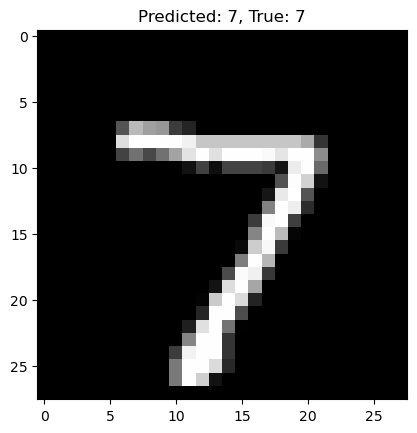

In [359]:
model_gpu.eval()

X, y = test_data[0]      # first image + true label
print("True label:", y)
X = X.unsqueeze(0)  # add batch dimension & move to GPU
with torch.no_grad():
    logits = model(X)
    pred = logits.argmax(dim=1).item()
print("Predicted label:", pred)
import matplotlib.pyplot as plt

plt.imshow(test_data[0][0].squeeze(), cmap="gray")
plt.title(f"Predicted: {pred}, True: {y}")
plt.show()


True label: 2
Predicted label: 2


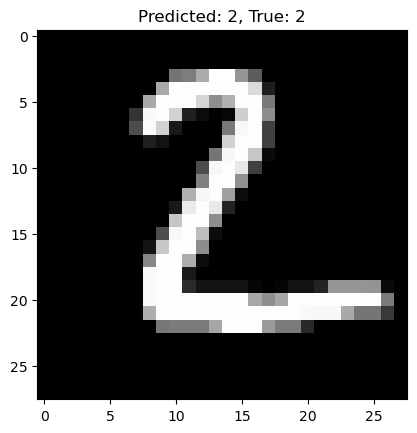

In [361]:
model_gpu.eval()

X, y = test_data[1]      # first image + true label
print("True label:", y)
X = X.unsqueeze(0)  # add batch dimension & move to GPU
with torch.no_grad():
    logits = model(X)
    pred = logits.argmax(dim=1).item()
print("Predicted label:", pred)
import matplotlib.pyplot as plt

plt.imshow(test_data[1][0].squeeze(), cmap="gray")
plt.title(f"Predicted: {pred}, True: {y}")
plt.show()
